# Getting Started in Machine Learning

### Chapter 18: Decision Trees

This notebook contains examples from the book:

Getting Started in Machine Learning: Easy Recipes for Python 3, Scikit-Learn, Jupyter (2019) by Bella Romeo, Sherwood Forest Books, Los Angeles, CA, USA, ISBN-13: 978-0-9966860-6-8

(c) Copyright 2019.

<font style="font-size:xx-small; font-family:courier;">

    This notebook is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program. If not, see <https://www.gnu.org/licenses/>.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
                 header=None,na_values="?")
data.columns=("mpg","cyl","displ","hp","weight","accel","model","origin","carname")
data = data.dropna(axis=0)
print(data[:5])

    mpg  cyl  displ     hp  weight  accel  model  origin  \
0  18.0    8  307.0  130.0  3504.0   12.0     70       1   
1  15.0    8  350.0  165.0  3693.0   11.5     70       1   
2  18.0    8  318.0  150.0  3436.0   11.0     70       1   
3  16.0    8  304.0  150.0  3433.0   12.0     70       1   
4  17.0    8  302.0  140.0  3449.0   10.5     70       1   

                       carname  
0  "chevrolet chevelle malibu"  
1          "buick skylark 320"  
2         "plymouth satellite"  
3              "amc rebel sst"  
4                "ford torino"  


In [3]:
cars=np.array(data[["cyl","mpg","displ","hp","weight","accel"]])
cars=np.array([line for line in cars if line[0] in [4,6,8]])
Y=cars[:,0]/2-2
X=cars[:,1:]

In [4]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
nsplits=100
depth=3
errs=[]
for j in range(nsplits):
    XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
    DT=tree.DecisionTreeClassifier(max_depth=depth)
    DT.fit(XTRAIN, YTRAIN)
    YP=DT.predict(XTEST)
    errs.append(1-accuracy_score(YTEST,YP))
print("Decision Tree Depth = %d mean error = %7.6f SD = %7.6f"\
     %(depth,np.mean(errs),np.std(errs)))

Decision Tree Depth = 3 mean error = 0.022990 SD = 0.014049


## Make a plot of the final Tree

In [6]:
import graphviz
import pydotplus
from IPython.display import Image


In [7]:
dot_data = tree.export_graphviz(DT, out_file=None, rotate=False, 
            feature_names=["mpg","displ","hp","weight","accel"],
            class_names=list(map(str,[4,6,8])),
 filled=True, rounded=True, special_characters=True)
  

In [8]:
graph2 = pydotplus.graph_from_dot_data(dot_data)  

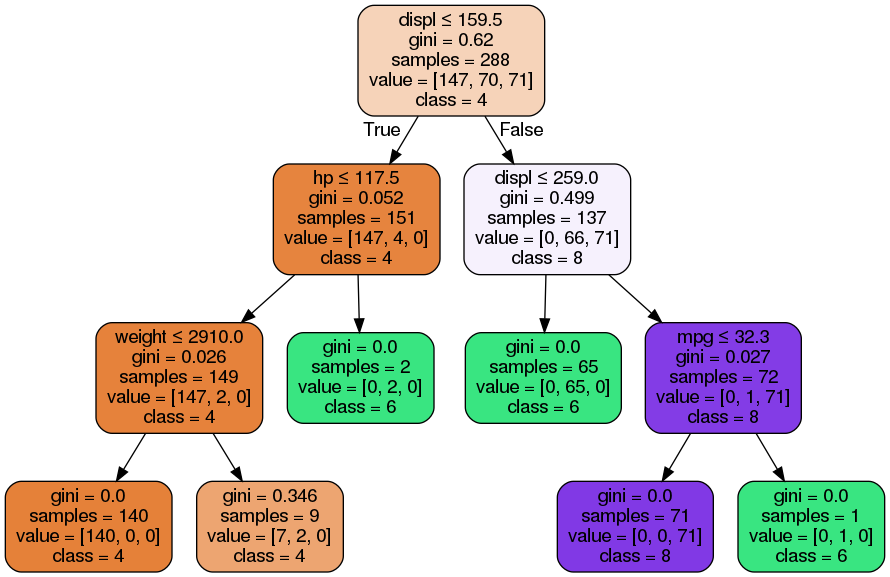

In [9]:
Image(graph2.create_png())

In [10]:
graph2.write_pdf("Decision-Tree-Cylinders-Depth-3.pdf")

True

## Repeat in 2 dimensions using Principal Components

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

pca=PCA(n_components=2)
pca.fit(X)
P=pca.transform(X)
scaler = MinMaxScaler()
Q=scaler.fit_transform(P)

nsplits=100
errs=[]
for j in range(nsplits):
    XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(Q,Y)
    #DT=tree.DecisionTreeClassifier(max_depth=depth)
    DT=tree.DecisionTreeClassifier()

    DT.fit(XTRAIN, YTRAIN)
    YP=DT.predict(XTEST)
    errs.append(1-accuracy_score(YTEST,YP))
print("Decision Tree (2 PC) mean err = %7.6f SD = %7.6f"\
     %(np.mean(errs),np.std(errs)))

Decision Tree (2 PC) mean err = 0.071237 SD = 0.030586


## Final plot - 2 PC

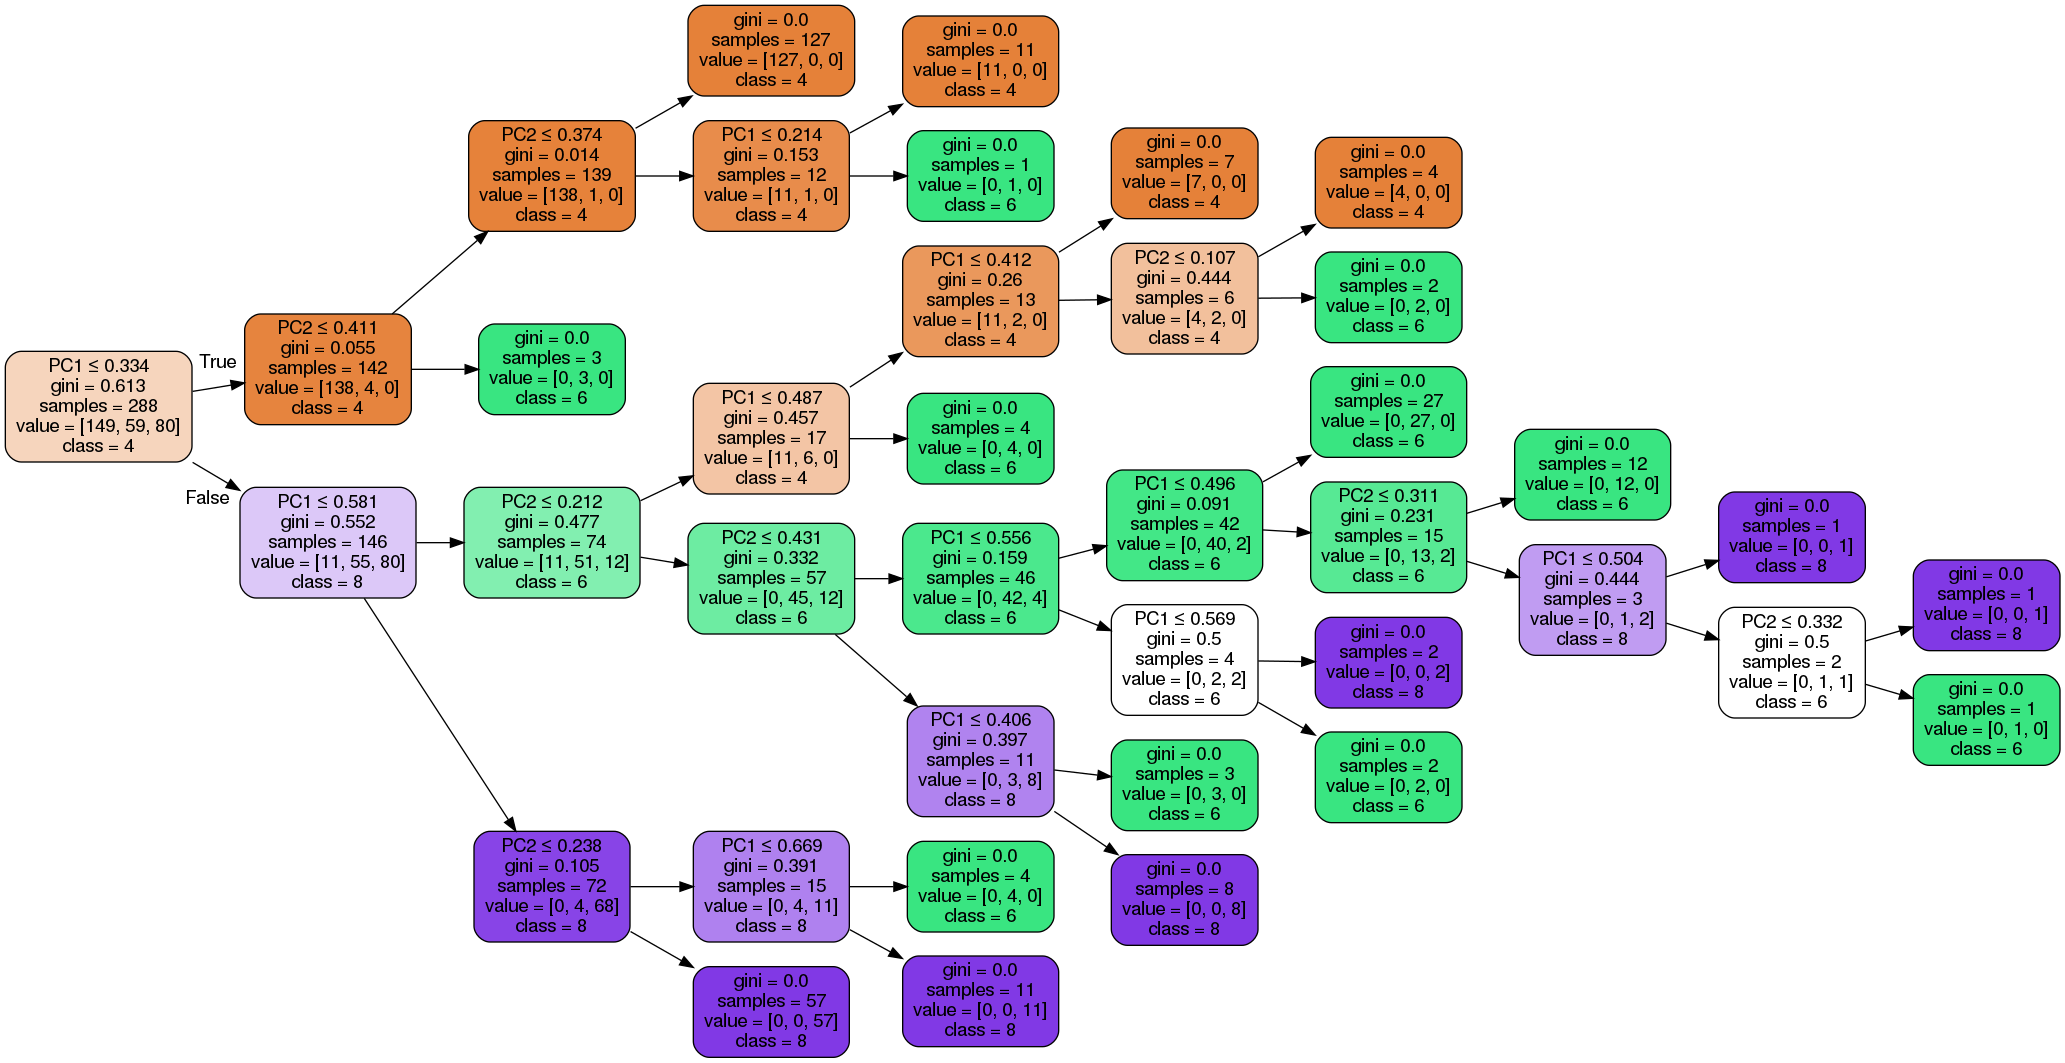

In [12]:
dot_data_PCA = tree.export_graphviz(DT, out_file=None, rotate=True, 
            feature_names=["PC1","PC2"],
            class_names=list(map(str,[4,6,8])),
 filled=True, rounded=True, special_characters=True)
graphPC = pydotplus.graph_from_dot_data(dot_data_PCA)  
Image(graphPC.create_png())

In [13]:
graphPC.write_pdf("Decision-Tree-Cylinders-Princ-Components.pdf")

True

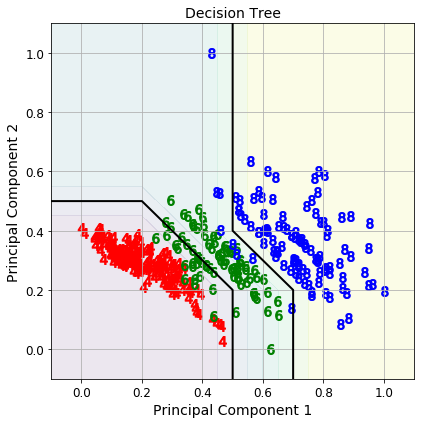

In [14]:
def visualize_PC(ax,clf,X,Y,DX,DY,thelevels,colors,markers,xlab="X",
                                ylab="Y", axtitle="Classification Boundary"):
    xinterval = X[:, 0].min() - 1, X[:, 0].max() + 1
    yinterval = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(*xinterval, DX),
                         np.arange(*yinterval, DY))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    c=ax.contour(xx, yy, Z, alpha=1,levels=thelevels,linewidths=2,colors="k")
    c=ax.contourf(xx, yy, Z, alpha=.1)
        
    nclasses=len(colors)
    for i in range(nclasses):
        x,y=zip(*X[Y==i])
        ax.scatter(x,y,marker=markers[i],color=colors[i],s=100)


    ax.set_xlabel(xlab,fontsize=14)
    ax.set_ylabel(ylab,fontsize=14)
    ax.set_title(axtitle,fontsize=14)
    ax.set_xlim(xinterval)
    ax.set_ylim(yinterval)

    ax.grid()
    return(ax)
    
colors=["red", "green","blue"]
markers=["$4$","$6$","$8$"]

fig,ax=plt.subplots(nrows=1,ncols=1,sharex=True,sharey=True)

visualize_PC(ax,DT, Q,Y, .2, .2,[0.5,1.5],colors,markers,xlab="Principal Component 1",
            ylab="Principal Component 2",axtitle="Decision Tree")

ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.set_ylim(-.1,1.1)
ax.set_xlim(-.1,1.1)

fig.set_size_inches(6, 6)
fig.tight_layout()
#fig.savefig("Decision-Tree-PCA-Decision-Boundary.pdf")


## Compare vs Depth - full model

In [15]:
nsplits=100
for depth in range(2,11):
  errs=[]
  for j in range(nsplits):
    XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
    DT=tree.DecisionTreeClassifier(max_depth=depth)
    DT.fit(XTRAIN, YTRAIN)
    YP=DT.predict(XTEST)
    errs.append(1-accuracy_score(YTEST,YP))
  print("Decision Tree Depth = %d mean error = %7.6f SD = %7.6f"\
     %(depth,np.mean(errs),np.std(errs)))

Decision Tree Depth = 2 mean error = 0.020206 SD = 0.011191
Decision Tree Depth = 3 mean error = 0.021856 SD = 0.015241
Decision Tree Depth = 4 mean error = 0.020825 SD = 0.017001
Decision Tree Depth = 5 mean error = 0.020309 SD = 0.013712
Decision Tree Depth = 6 mean error = 0.022887 SD = 0.014476
Decision Tree Depth = 7 mean error = 0.022062 SD = 0.013123
Decision Tree Depth = 8 mean error = 0.023093 SD = 0.017381
Decision Tree Depth = 9 mean error = 0.021340 SD = 0.014229
Decision Tree Depth = 10 mean error = 0.022577 SD = 0.016215
